## <h2 align="center"><font color = 'firebrick'>Diabetes Prediction and Exploratory Data Analysis </font></h2>

 ![alt text](https://i.pinimg.com/1200x/8d/81/a5/8d81a5c3d915bef79416f573d0d34bb1.jpg)

## <div class ="alert alert-warning">About this project</div>

> - The objective of this project is to diagnostically predict whether someone has diabetes or not based on certain diagnostic measurements included in the dataset.
> - The dataset consists of several Medical Variables(Independent) and one Outcome Variable(Dependent)
> - The independent variables in this data set are :-'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin','BMI', 'DiabetesPedigreeFunction', and 'Age'
> - The outcome variable value is either 1 or 0 indicating whether a person has diabetes(1) or not(0).

## <div class ="alert alert-warning">About the dataset</div>

> - Pregnancies: No. of times pregnant
> - Glucose: Plasma Glucose Concentration (mg/dl)
> - Blood Pressure: Diastolic Blood Pressure(mmHg)
> - Skin Thickness: A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.
> - Insulin: 2-Hour Serum Insulin (mcU/mL)
> - BMI: Body Mass Index (weight in kg/ height in m2)
> - Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.
> - Age: Age (years)
> - Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

### <font color = 'teal'>Importing required libraries</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

### <font color = 'teal'>Loading the dataset</font>

In [2]:
data = pd.read_csv('diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## <div class ="alert alert-warning">Exploratory Data Analysis</div>

### <font color = 'teal'>Understanding the dataset</font>

In [3]:
# Number Of Rows and Columns In the DataFrame

print(f'The number of rows in the dataframe is: {data.shape[0]} \nThe number of columns in the dataframe is: {data.shape[1]} \n')

The number of rows in the dataframe is: 768 
The number of columns in the dataframe is: 9 



In [4]:
# Checking Statistical Data Of the DataFrame

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


> It is to be noted that some specific columns namely: 'Glucose','BloodPressure','SkinThickness','Insulin', and 'BMI' have 0 as the minimum value, which is __not possible__. We can treat these as null values and impute them accordingly. The number of pregnancies as 0 is possible.

In [5]:
zeroes = pd.DataFrame({'BloodPressure': data[data['BloodPressure'] == 0].shape[0],
                      'Glucose': data[data['Glucose'] == 0].shape[0],
                      'SkinThickness': data[data['SkinThickness'] == 0].shape[0],
                      'Insulin': data[data['Insulin'] == 0].shape[0],
                      'BMI': data[data['BMI'] == 0].shape[0]}, index = ['zeroes'])


zeroes.T

,zeroes
BloodPressure,35
Glucose,5
SkinThickness,227
Insulin,374
BMI,11


In [6]:
# Checking for any missing values
data.isnull().sum().any()

False

### <font color = 'teal'>Visualizing the specific columns</font>

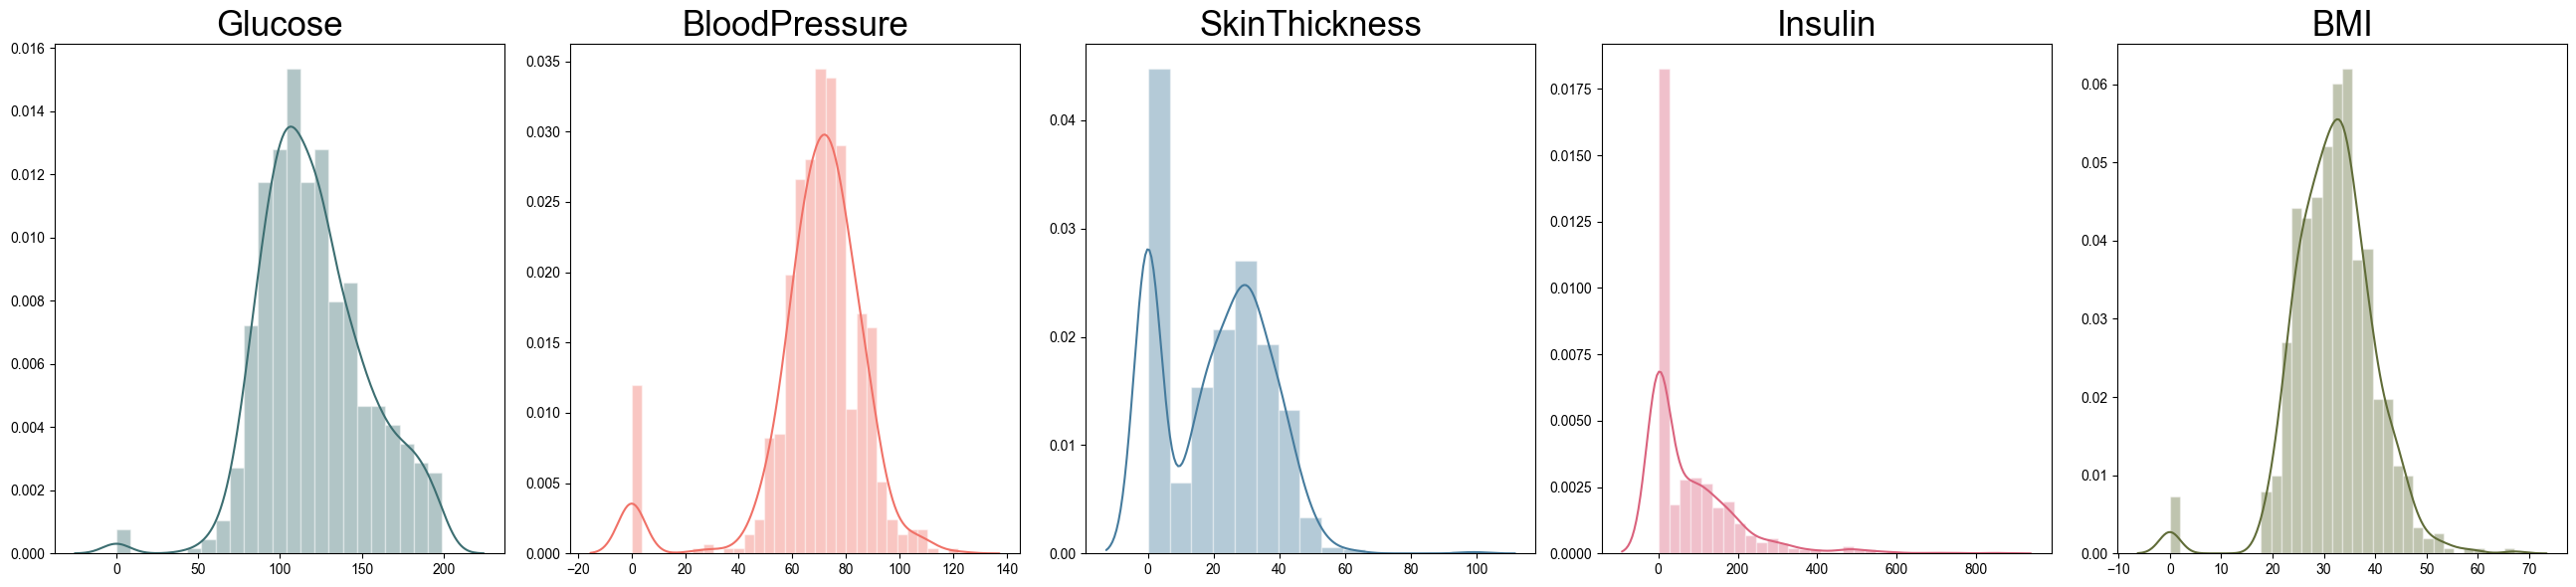

In [7]:
fig, axes = plt.subplots(1,5, figsize=(26,6))
ax = axes.flatten()

columns = data.columns[1:6]
colours=['#3c6e71','#f07167','#457b9d','#da627d','#606c38'] 

# sns.set(rc={'figure.figsize':(20,5)})
sns.set_style(style='white')
for i, col in enumerate(columns): 
    plot = sns.distplot(data[col], ax =ax[i], hist=True, rug=False, color=colours[i])
    ax[i].set_title(col)
    ax[i].ticklabel_format(style='plain', axis='both')
    plot.set(xlabel = None)
    plot.set(ylabel = None)
    plot.title.set_fontsize('25')

fig.tight_layout(w_pad=1, h_pad=4)  # change padding         
plt.show()

> These columns have __skewed or non-normal distribution__ and hence the mean is more affected by outliers than the median. Therefore, we replace the 0 values in these columns by the __median values__ since it is a better choice.

In [8]:
# Replacing 0 values with median of that column

data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['BMI'] = data['BMI'].replace(0,data['BMI'].median())

### <font color = 'teal'>Plotting the Outcome column</font>


#### Barplot for the dependent variable

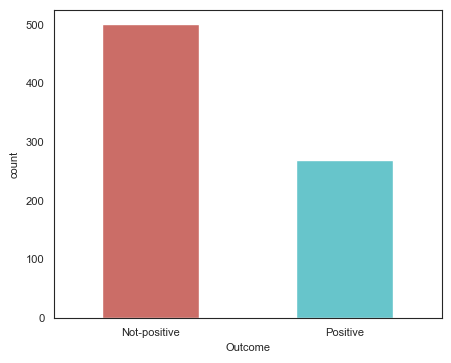

Healthy people:  65.1 percentage
Diabetic people:  34.9 percentage


In [9]:
from matplotlib.pyplot import figure

figure(figsize = (5,4))
plt.rcParams['font.size'] = 8
ax = sns.countplot(x= data['Outcome'], data=data, palette='hls', width = 0.5)
ax.set_xticklabels(['Not-positive', 'Positive'])
positive_perc = round(100*len(data[data['Outcome']==1])/len(data),2)
non_positive_perc = round(100*len(data[data['Outcome']== 0])/len(data),2)

plt.show()

print('Healthy people: ', non_positive_perc,'percentage')
print('Diabetic people: ', positive_perc,'percentage')


### <font color = 'teal'>Feature engineering</font>

Not using StandardScaler() since the data distribution across all the columns does not follow a normal distribution.



In [10]:
# Using MinMaxScaler(), scaling those columns which have values greater than 1

from sklearn.preprocessing import MinMaxScaler

columns = [c for c in data.columns if data[c].max()>1]

scaled_columns = MinMaxScaler().fit_transform(data[columns])
scaled_columns = pd.DataFrame(scaled_columns, columns = columns)
scaled_columns['Outcome'] = data['Outcome'] 


# Copying the scaled DataFrame to a new DataFrame

diabetes = scaled_columns
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
5,0.294118,0.464516,0.510204,0.173913,0.019832,0.151329,0.052519,0.150000,0
6,0.176471,0.219355,0.265306,0.271739,0.088942,0.261759,0.072588,0.083333,1
7,0.588235,0.458065,0.489796,0.173913,0.019832,0.349693,0.023911,0.133333,0
8,0.117647,0.987097,0.469388,0.413043,0.635817,0.251534,0.034159,0.533333,1
9,0.470588,0.522581,0.734694,0.173913,0.019832,0.282209,0.065756,0.550000,1


### <font color = 'teal'>Feature selection</font>

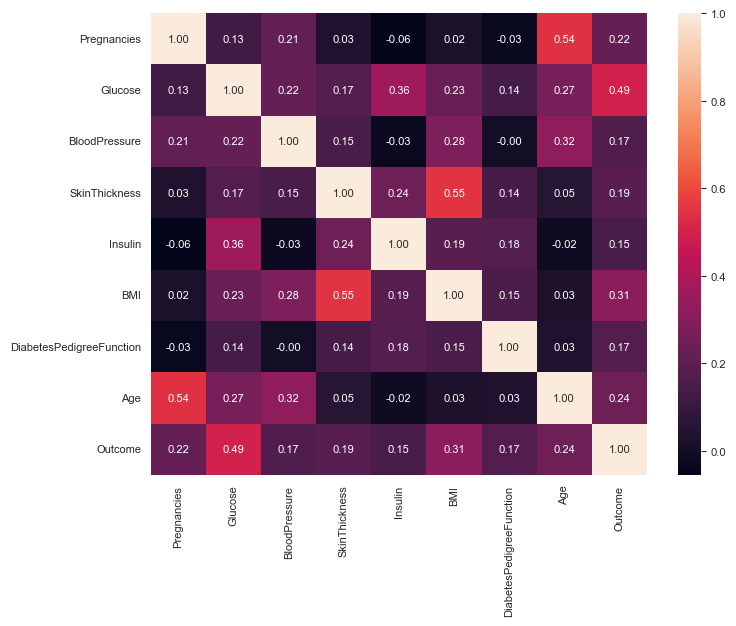

In [11]:
# Correlation between all the features
plt.figure(figsize=(8,6))

#correlation matrix
dataplot = sns.heatmap(diabetes.corr(), annot=True, fmt='.2f')

> This heatmap reflects the existing fetures in the dataset and their correlation scores with each and every feature. From the observation, it is clear that __Glucose, BMI__ and __Age__ are the __most correlated__ with Outcome while __BloodPressure, Insulin, SkinThickness__ and __DiabetesPedigreeFunction__ are the __least correlated__. As they do not contribute much to the model, we can drop them.

In [12]:
df_selected= diabetes.drop(['BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'],axis='columns')
list(df_selected.columns)

['Pregnancies', 'Glucose', 'BMI', 'Age', 'Outcome']

### <font color = 'teal'>Splitting the dataset into features and target variables</font>

In [13]:
X = df_selected.drop(['Outcome'],axis=1) #Feature variables
y = df_selected['Outcome'] #Target variable

In [14]:
X.head()

,Pregnancies,Glucose,BMI,Age
0,0.352941,0.670968,0.314928,0.483333
1,0.058824,0.264516,0.171779,0.166667
2,0.470588,0.896774,0.104294,0.183333
3,0.058824,0.290323,0.202454,0.000000
4,0.000000,0.600000,0.509202,0.200000


### <font color = 'teal'>Performing train-test split</font>

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify=df_selected['Outcome'], random_state= 0)

This stratify parameter makes a split so that the proportion of values produced in the sample will be the same as the proportion of values provided to parameter stratify and thus removes biasness.

In [16]:
X_train.shape, X_test.shape

((614, 4), (154, 4))

## <div class ="alert alert-warning">Classification Algorithms</div>

> - Logistic Regression
> - KNN
> - Naive Bayes
> - SVM
> - Decision Tree
> - Random Forest

### <font color = 'teal'>1. Using Logistic Regression</font>

>In simplest terms, logistic regression is used to evaluate the likelihood of the dependent variable, which is categorical in nature, as per the independent variable.

Confusion matrix:



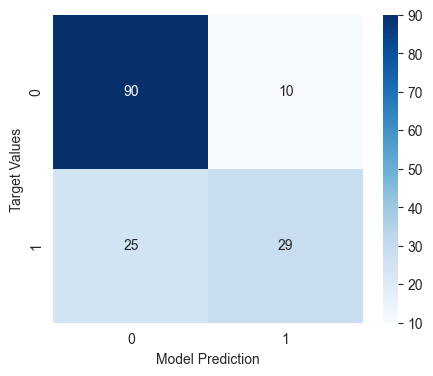

Accuracy score for train set:  0.7638
Accuracy score for test set:  0.7727
Precision score:  0.7436
Recall score:  0.537


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# Instantiate the model using the default parameters
reg = LogisticRegression()

# fitting the model with data
reg.fit(X_train, y_train)

# predictions
y_train_predicted = reg.predict(X_train)
y_test_predicted = reg.predict(X_test)


conf = confusion_matrix(y_test, y_test_predicted)
print('Confusion matrix:\n')
plt.figure(figsize=(5,4))
plt.rcParams['font.size'] = 10
p = sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues")
plt.ylabel('Target Values')
plt.xlabel('Model Prediction')
plt.show()


print("Accuracy score for train set: ", round(metrics.accuracy_score(y_train, y_train_predicted),4))
print ("Accuracy score for test set: ", round(metrics.accuracy_score(y_test, y_test_predicted),4))
print("Precision score: ", round(metrics.precision_score(y_test, y_test_predicted),4))
print("Recall score: ", round(metrics.recall_score(y_test, y_test_predicted),4))



> __Confusion matrix__ is a evaluation metric for ML classification problems where output can be two or more classes. __Precision__ describes how well the model can predict the labels correctly. __Recall__ describes how well the model can retrieve all the labels correctly.

#### <font color = 'steelblue'>We get an accuracy score of 77% using Logistic Regression.</font>

In [18]:
# Full report
print("Classification Report for Logistic Regression:\n", metrics.classification_report(y_test,y_test_predicted))

f1_lr = metrics.f1_score(y_test, y_test_predicted, average="weighted")
print("F1 Score:", round(f1_lr,2))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       100
           1       0.74      0.54      0.62        54

    accuracy                           0.77       154
   macro avg       0.76      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

F1 Score: 0.76


#### <font color = 'darkslategrey'>The F1 score is slightly above the average (76%). It is an important metric since greater the value of F1 score, better the model is.</font>

In [19]:
acc_LR= round(metrics.accuracy_score(y_test, y_test_predicted),4)
f1_LR = round(f1_lr,2)
model_score = pd.DataFrame(columns = ("Model","Accuracy","F1 score"))
model_score = model_score.append(pd.DataFrame({'Model':['Logistic Regression'], 'Accuracy':[acc_LR], 'F1 score':[f1_LR]}))

### <font color ='teal'>2. Using KNNs Algorithm</font>

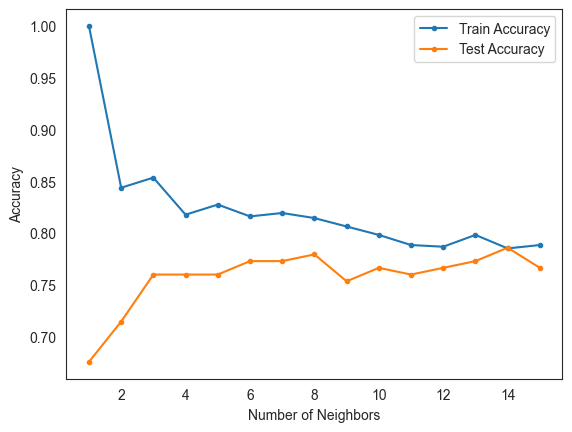

In [20]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_range = range(1, 16)

for n_neighbors in neighbors_range:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_range, train_accuracy, marker='.', label="Train Accuracy")
plt.plot(neighbors_range, test_accuracy, marker='.', label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.legend()


> When more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is obtained at n=14, i.e. the above plot suggests that we should choose __n_neighbors = 14__.

In [21]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

print('Accuracy on train set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy on train set: 0.79
Accuracy on test set: 0.79


#### <font color = 'steelblue'>We get an accuracy score of 79% using KNN Classifier.</font>

Confusion matrix:



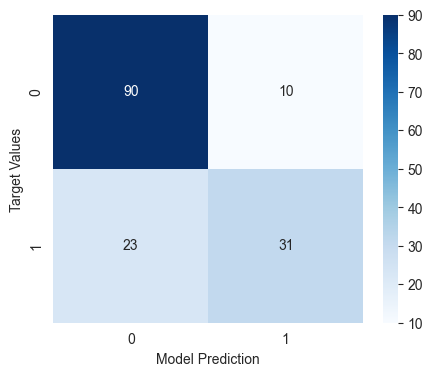

Precision score:  0.7561
Recall score:  0.5741


In [22]:
# predictions
y_test_predicted = knn.predict(X_test)


conf = confusion_matrix(y_test, y_test_predicted)
print('Confusion matrix:\n')
plt.figure(figsize=(5,4))
plt.rcParams['font.size'] = 10
p = sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues")
plt.ylabel('Target Values')
plt.xlabel('Model Prediction')
plt.show()

print("Precision score: ", round(metrics.precision_score(y_test, y_test_predicted),4))
print("Recall score: ", round(metrics.recall_score(y_test, y_test_predicted),4))

In [23]:
# Full report
print("Classification Report for KNN Classification: \n", metrics.classification_report(y_test,y_test_predicted))

f1_knn = metrics.f1_score(y_test, y_test_predicted, average="weighted")
print("F1 Score:", round(f1_knn,2))

Classification Report for KNN Classification: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.57      0.65        54

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

F1 Score: 0.78


#### <font color = 'darkslategrey'>The F1 score is average (78%) .</font>

In [24]:
acc_KNN= round(metrics.accuracy_score(y_test, y_test_predicted),4)
f1_KNN = round(f1_knn,2)
model_score = model_score.append(pd.DataFrame({'Model':['KNN algorithm'], 'Accuracy':[acc_KNN], 'F1 score':[f1_KNN]}))

### <font color = 'teal'>3. Using Naive Bayes Classification Algorithm</font>

>__Naive Bayes__ is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. It assumes that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result.


In [25]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_test_predicted = gnb.predict(X_test)

print("Classification Report for Naive Bayes classification: \n", metrics.classification_report(y_test,y_test_predicted))
accuracy_nb = metrics.accuracy_score(y_test, y_test_predicted)
f1_nb = metrics.f1_score(y_test, y_test_predicted, average="weighted")

print("Accuracy:", round(accuracy_nb,2))
print("F1 Score:", round(f1_nb,2))

Classification Report for Naive Bayes classification: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

Accuracy: 0.75
F1 Score: 0.74


#### <font color = 'steelblue'>We get comparatively lower accuracy score (75%) and F1 score (74%) using Naive Bayes classifier.</font>

Confusion matrix:



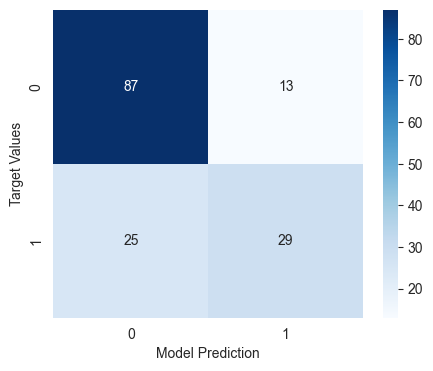

Precision score:  0.6905
Recall score:  0.537


In [26]:
conf = confusion_matrix(y_test, y_test_predicted)
print('Confusion matrix:\n')
plt.figure(figsize=(5,4))
plt.rcParams['font.size'] = 10
p = sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues")
plt.ylabel('Target Values')
plt.xlabel('Model Prediction')
plt.show()

print("Precision score: ", round(metrics.precision_score(y_test, y_test_predicted),4))
print("Recall score: ", round(metrics.recall_score(y_test, y_test_predicted),4))

> One disadvantage of this algorithm is the assumption of independent features. In practice, it is almost impossible that models will get a set of predictors which are entirely independent.

In [27]:
acc_NB= round(accuracy_nb,4)
f1_NB = round(f1_nb,2)
model_score = model_score.append(pd.DataFrame({'Model':['Naive Bayes'], 'Accuracy':[acc_NB], 'F1 score':[f1_NB]}))

### <font color = 'teal'>4. Using Support Vector Machine Algorithm</font>

> __Support Vector Machine (SVM)__ is used for both classification or regression challenges, but typically leveraged for classification problems. It constructs a hyperplane where the distance between two classes of data points is at its maximum. This hyperplane is known as the decision boundary, separating the classes of data points (e.g., person has diabetes vs doesn't have diabetes) on either side of the plane.

>The data points or vectors that are the closest to the hyperplane and which affect the position of the hyperplane are termed as __Support Vector__. Since these vectors support the hyperplane, hence called a Support vector.

In [28]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_test_predicted = svm_model.predict(X_test)

print("Classification Report for SVM algorithm: \n", metrics.classification_report(y_test,y_test_predicted))
accuracy_svm = metrics.accuracy_score(y_test, y_test_predicted)
f1_svm = metrics.f1_score(y_test, y_test_predicted, average="weighted")

print("Accuracy:", round(accuracy_svm,2))
print("F1 Score:", round(f1_svm,2))

Classification Report for SVM algorithm: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.57      0.65        54

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154

Accuracy: 0.79
F1 Score: 0.78


#### <font color = 'steelblue'>We get comparatively higher accuracy score (79%) and F1 score (78%) using SVM algorithm.</font>

Confusion matrix:



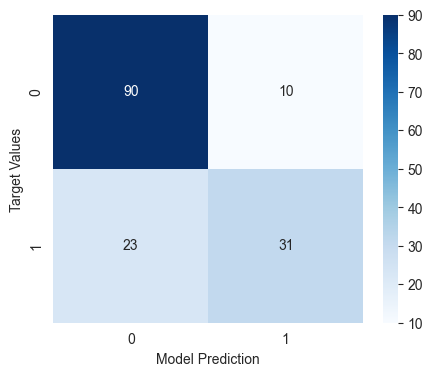

Precision score:  0.7561
Recall score:  0.5741


In [29]:
conf = confusion_matrix(y_test, y_test_predicted)
print('Confusion matrix:\n')
plt.figure(figsize=(5,4))
plt.rcParams['font.size'] = 10
p = sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues")
plt.ylabel('Target Values')
plt.xlabel('Model Prediction')
plt.show()

print("Precision score: ", round(metrics.precision_score(y_test, y_test_predicted),4))
print("Recall score: ", round(metrics.recall_score(y_test, y_test_predicted),4))

In [30]:
acc_SVM= round(accuracy_svm,4)
f1_SVM = round(f1_svm,2)
model_score = model_score.append(pd.DataFrame({'Model':['SVM algorithm'], 'Accuracy':[acc_SVM], 'F1 score':[f1_SVM]}))

### <font color = 'teal'>5. Using Decision Tree Algorithm</font>

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=6, random_state= 42, criterion='entropy')
dtree.fit(X_train, y_train)
print('Accuracy on train set: {:.2f}'.format(dtree.score(X_train, y_train)))

Accuracy on train set: 0.83


In [32]:
y_test_predicted = dtree.predict(X_test)

print("Classification Report for Decision Tree algorithm: \n", metrics.classification_report(y_test,y_test_predicted))
accuracy_dt = metrics.accuracy_score(y_test, y_test_predicted)
f1_dt = metrics.f1_score(y_test, y_test_predicted, average="weighted")

print("Accuracy:", round(accuracy_dt,2))
print("F1 Score:", round(f1_dt,2))

Classification Report for Decision Tree algorithm: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

Accuracy: 0.77
F1 Score: 0.76


#### <font color = 'steelblue'>We get an accuracy score of 77% and F1 score of 76% using the Decision Tree algorithm.</font>

### Feature importance in Decision trees
Feature importance rates how important each feature is for the decision a tree makes (ranges between 0 and 1)

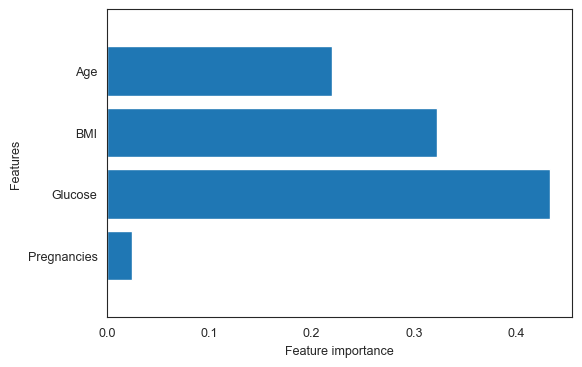

In [33]:
def plot_feature_importances(model):
    plt.figure(figsize=(6,4))
    plt.rcParams['font.size'] = 9
    n_features = 4
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances(dtree)

Confusion matrix:



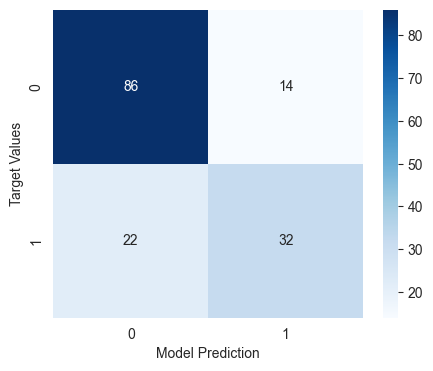

Precision score:  0.6957
Recall score:  0.5926


In [34]:
conf = confusion_matrix(y_test, y_test_predicted)
print('Confusion matrix:\n')
plt.figure(figsize=(5,4))
plt.rcParams['font.size'] = 10
p = sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues")
plt.ylabel('Target Values')
plt.xlabel('Model Prediction')
plt.show()

print("Precision score: ", round(metrics.precision_score(y_test, y_test_predicted),4))
print("Recall score: ", round(metrics.recall_score(y_test, y_test_predicted),4))

In [35]:
acc_DT= round(accuracy_dt,4)
f1_DT = round(f1_dt,2)
model_score = model_score.append(pd.DataFrame({'Model':['Decision Tree'], 'Accuracy':[acc_DT], 'F1 score':[f1_DT]}))

### <font color = 'teal'>6. Using Random Forest Algorithm</font>

>Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

>The "forest" references a collection of uncorrelated decision trees, which are then merged together to reduce variance and create more accurate data predictions. This works well because a single decision tree may be prone to error. Random forest will be having higher credibility as compared to using one decision tree. __'n_estimators'__ is the number of trees we want to build before taking the maximum voting or averages of predictions. Higher number of trees implies better performance of the model.

In [36]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train,y_train)

y_test_predicted = classifier.predict(X_test)

print("Classification Report for Random Forest Algorithm: \n", metrics.classification_report(y_test,y_test_predicted))
accuracy_rf = metrics.accuracy_score(y_test, y_test_predicted)
f1_rf = metrics.f1_score(y_test, y_test_predicted)

print("Accuracy:", round(accuracy_rf,2))
print("F1 Score:", round(f1_rf,2))

Classification Report for Random Forest Algorithm: 
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       100
           1       0.74      0.63      0.68        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154

Accuracy: 0.79
F1 Score: 0.68


#### <font color = 'steelblue'>Although we get a higher accuracy score of 79% , the F1 score went down.</font>

### Feature importance in Random Forest classification

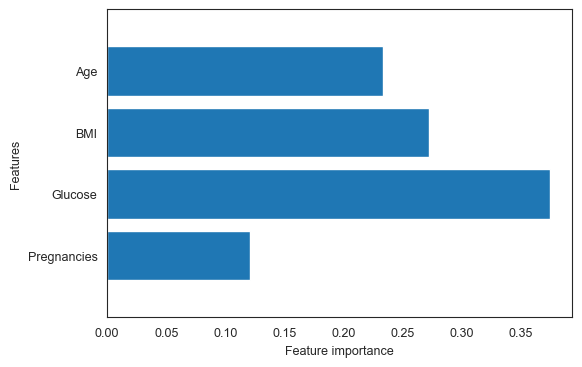

In [37]:
plot_feature_importances(classifier)

>Similar to a single decision tree, the random forest also gives the maximum importance to the 'Glucose' feature and chooses 'BMI' to be the second most informative feature overall.

Confusion matrix:



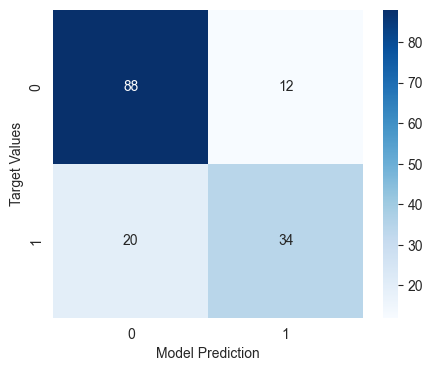

Precision score:  0.7391
Recall score:  0.6296


In [38]:
conf = confusion_matrix(y_test, y_test_predicted)
print('Confusion matrix:\n')
plt.figure(figsize=(5,4))
plt.rcParams['font.size'] = 10
p = sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues")
plt.ylabel('Target Values')
plt.xlabel('Model Prediction')
plt.show()

print("Precision score: ", round(metrics.precision_score(y_test, y_test_predicted),4))
print("Recall score: ", round(metrics.recall_score(y_test, y_test_predicted),4))

In [39]:
acc_RF= round(accuracy_rf,4)
f1_RF = round(f1_rf,2)
model_score = model_score.append(pd.DataFrame({'Model':['Random Forest'], 'Accuracy':[acc_RF], 'F1 score':[f1_RF]}))

### <font color = 'teal'>7. Building a Model Using Neural Networks</font>

In [40]:
#Import Dependencies
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

Dense is used to create fully connected layers, in which every output depends on every input.

Sequential() to create a model consisting of linear stack of layers with no branching and skipping. In other words, an output of a layer is the input of the next layer.

In [41]:
#Build and Compile Model

X_train=pd.DataFrame(X_train)
model = Sequential()          
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

>__Epoch__ is he number of times the algorithm runs on the whole training dataset. __Batch__ denotes the number of samples to be taken for updating the model parameters. __Loss Function__ is the cost function used to calculate the cost, which is the difference between the predicted value and the actual value.

In [43]:
import keras
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics='accuracy')

#Fit, Predict and Evaluate
model.fit(X_train, y_train, epochs=60, batch_size=32)

Epoch 1/60
20/20 [==============================] - 0s 966us/step - loss: 0.6860 - accuracy: 0.6173
Epoch 2/60
20/20 [==============================] - 0s 796us/step - loss: 0.6716 - accuracy: 0.6515
Epoch 3/60
20/20 [==============================] - 0s 821us/step - loss: 0.6606 - accuracy: 0.6515
Epoch 4/60
20/20 [==============================] - 0s 833us/step - loss: 0.6475 - accuracy: 0.6515
Epoch 5/60
20/20 [==============================] - 0s 901us/step - loss: 0.6343 - accuracy: 0.6531
Epoch 6/60
20/20 [==============================] - 0s 679us/step - loss: 0.6183 - accuracy: 0.6596
Epoch 7/60
20/20 [==============================] - 0s 820us/step - loss: 0.6033 - accuracy: 0.6629
Epoch 8/60
20/20 [==============================] - 0s 847us/step - loss: 0.5849 - accuracy: 0.7117
Epoch 9/60
20/20 [==============================] - 0s 826us/step - loss: 0.5627 - accuracy: 0.7117
Epoch 10/60
20/20 [==============================] - 0s 832us/step - loss: 0.5408 - accuracy: 0.7329

In [44]:
y_test_predicted = model.predict(X_test)
y_test_predicted = [0 if val < 0.5 else 1 for val in y_test_predicted]
round(accuracy_score(y_test, y_test_predicted),4)

5/5 [==============================] - 0s 2ms/step


0.7727

In [45]:
# Comparison of scores
model_score

,Model,Accuracy,F1 score
0,Logistic Regression,0.7727,0.76
0,KNN algorithm,0.7857,0.78
0,Naive Bayes,0.7532,0.74
0,SVM algorithm,0.7857,0.78
0,Decision Tree,0.7662,0.76
0,Random Forest,0.7922,0.68


#### Project done by Pratiek Sarkar